<h1 style="text-align:center"><strong>Vegetation Files In Cape Town</strong>: An Exploratory Analysis</h1>
<p style="text-align:left">Dataset: <a href="https://www.kaggle.com/pinsleepe/vegetation-fires-in-cape-town">Kaggle</a> </p>
<p style="text-align:left">Dataset Author's Acknowledgement: <a href="https://web1.capetown.gov.za/web1/OpenDataPortal/DatasetDetail?DatasetName=Fire%20incidence">The City of Cape Town Portal</a> </p>

### Interesting Articles on Wildfires
<blockquote><a href="https://www.thesouthafrican.com/news/cape-town-fires-latest-updates-news-monday-19-april-evacuated-arson/">Cape Town fires: Several suburbs evacuated, arson suspect ‘in custody’
</a></blockquote>
<blockquote><a href="https://www.westerncape.gov.za/general-publication/wildfire-season">Wildfire season
</a></blockquote><blockquote><a href="https://www.bbc.com/news/world-africa-56793317">Table Mountain fire: Historic buildings destroyed in Cape Town
</a></blockquote>
<h3>Table of Contents</h3>


* [1. Introduction](#chapter2)
    * [Problem Context and Motivation](#section_2_1)
    * [Describing The Question](#section_2_2)
    * [The Overview of The Methodology](#section_2_3)
    * [Section Contents](#section_2_4)
* [2. Dataset Description](#chapter3)
    * [Origin](#section_3_1)
    * [Contents](#section_3_2)
    * [Date Collected](#section_3_3)
    * [Dataset Size](#section_3_4)
    * [Data Downloaded](#section_3_4)
    * [Validations](#section_3_4)
* [3. Aspect of Data Quality](#chapter4)
    * [Validity](#section_4_1)
    * [Accuracy](#section_4_2)
    * [Completeness](#section_4_3)
    * [Consistency](#section_4_4)
    * [Uniformity](#section_4_5)
    * [Answering The Question](#section_4_5)
 * [4. Data Wrangling](#chapter5)
    * [Tidyness](#section_5_1)
    * [Techniques](#section_5_2)
    * [Sense Checks (Raw vs Cleaned)](#section_5_3)
 * [5. Exploratory Analysis](#chapter6)
    * [Choice of Initial Visualisations and Statistics](#section_6_1)
    * [Appropriate Measures](#section_6_2)
    * [Relevance To Questions](#section_6_3)
    * [Consideration of Accuracy](#section_6_4)
    



<p style="text-align:right">Credits: <a href="https://www.thesouthafrican.com/news/cape-town-fires-latest-updates-news-monday-19-april-evacuated-arson/">The South African</a> </p>
<div style="text-align:center"><img src="Images/Cape Town Fires.jpg" width=900 height=900/></div>

<a id="chapter2" name="chapter2"></a>

<h2><strong>1. Introduction</strong>: Wildfire Season</h2> 

Cape Town is a popular tourist attraction situated at the southernmost tip of South Africa. It is famously known for its beautiful views, great food, and diverse cultures. However, it is also infamous for its bush fires that are often, as stated by <a href="https://www.westerncape.gov.za/general-publication/wildfire-season">Westerncape.gov.za</a>, actuated by accidents caused by people. This tyrannical period is called the <strong>Wildfire Season</strong> and, once started, is difficult to control. Wildfires are a threat to human life and vegetation. Both have a detrimental effect on the standards of living of people that reside within areas that were affected

<a id="section_2_1" name="section_2_1"></a>

<h3> Problem Context and Motivation </h3>
This report is motivated by the negative impact that wildfires have on civilians that live in Cape Town. Perhaps attempting to understand the indicative nature of the causes may create awareness and alert people on steps they could take to reduce the spread of bush fires.

<a id="section_2_2" name="section_2_2"></a>

<h3>Research Question </h3>
Given that we have information surrounding how and where the wildfires started, which <strong>cause</strong> contributes the most to a fire outbreak? 

<a id="hypothesis" name="hypothesis"></a>

<h3> Hypothesis </h3>
As stated in <a href="https://www.frontlinewildfire.com/what-causes-wildfires/">Frontlinewildfire.com</a>, fires are caused by: heat, fuel and oxygen. Locations in the proximity of where the wildfires start do not generate any significant heat that could cause huge fires. Fuel often requires human intervention to spark a fire. The hypothesis may be formally stated: <strong>There is a strong correlation between huge fires beginning and people being careless.</strong>

<a id="section_2_3" name="section_2_3"></a>

<h3>Methodology</h3>: Help Here - David suggests we were not clear enough

> 1. Read data and Gain Context.

> 2. Investigate the unique values and gain an intuition behind their values.

> 3. Check if there are any missing values and how their manipulation or deletion will impact the decisions made regarding the dataset.

> 4. Investigate the relationships between variables and accentuate the results using exploratory visualization methods.

> 5. Modify the values of each column appropriately to follow a uniform standard

> 6. Find a deterministic variable that has a correlation with the [hypothesis](#hypothesis)

<h3>Section Contents Overview</h3>
Left to someone who can answer this better than I can

<a id="chapter3" name="chapter3"></a>
<a id="section_3_1" name="section_3_1"></a>
<a id="section_3_2" name="section_3_2"></a>
<a id="section_3_3" name="section_3_4"></a>
<a id="section_3_4" name="section_3_4"></a>
<a id="section_3_5" name="section_3_5"></a>

<h2><strong>2. Data Description</strong>: Fire Log Cape Town Dataset</h2> 
The dataset is taken from <a href="https://www.kaggle.com/pinsleepe/vegetation-fires-in-cape-town">Kaggle</a>, contributed by a data scientist under the pseudonym <a href="https://www.kaggle.com/pinsleepe">Obrocka</a> as represented on Kaggle. The data collection spans from January 2009 to September 2017, and the author states that there are approximately five months of records missing.

<h3><strong>2.1 <span style="color:#34b4eb; text-decoration: underline;">Features</span> Of the Data and Thier Description</strong></h3>

> Below we descibe Every `Feature` in our dataset and possible values they can take 

<strong style="color:#34b4eb; text-decoration: underline;;">Incident_category</strong></br>
This feature describes where the fire happened, and it is categorized as follows, which are self-explanatory. Note that these are the possible values that this feature can take.
<ul>
    <li>Redential fire</li>
    <li>Transport fire</li>
    <li>Institutional fire</li>
    <li>Industy fire</li>
    <li>Motor vehicle accident</li>
    <li>Storage Facility</li>
    <li>Crime</li>
    <li>Commercial fire</li>
    <li>Public assembly fire</li>
    <li>Special incidents - fire services</li>
    <li>Other</li>
</ul>

<strong style="color:#34b4eb; text-decoration: underline;">District</strong></br>
This feature describes in which District did the fires happen. In the data wrangling process, this feature is divided into three other features. It's divided or encoded using "1 hot encoding".
<ul>
    <li>North</li>
    <li>West</li>
    <li>East</li>
</ul>

<strong style="color:#34b4eb; text-decoration: underline;">Description_of_Incident</strong></br>
This feature describes what caught fire or what caused the fire. And since there is an endless list of what could have caused a fire.
This dataset has approximately unique entries in this feature. Therefore listing all of them wouldn't be a good idea. We, however, list a few:
<ul>
    <li>Rubbish Fire</li>
    <li>Vehicle Fire</li>
    <li>False Alarm</li>    <li>Etc...</li>

</ul>

<strong style="color:#34b4eb; text-decoration: underline;">Wind</strong></br>
This feature describes the wind conditions at the time the fire incident took place and take one of the following values
<ul>
    <li>No Wind</li>
    <li>Light Breeze</li>
    <li>Moderate</li>
    <li>Strong</li>
    <li>Gale-Force</li>
</ul>

<strong style="color:#34b4eb; text-decoration: underline;">Details_of_cause</strong></br>
This feature goes in greater detail to explain how each incident start. The list here will also be endless but like a few features back we are going to describe a few incidents just to give a feel of the data.
<ul>
    <li>Adult Dropped A Light or Match</li>
    <li>Oil in ChipFryer overheating and igniting</li>
    <li>Paraffin Stove Overturning</li>
    <li>Pot of Food Left Unattended</li>
    <li>False Alarm</li>
    <li>Etc...</li>
</ul>

<strong id="Water" style="color:#34b4eb; text-decoration: underline;">Source_of_water</strong></br>
This feature tells us what water equipment was used to extinguish the fire. These appear as abbreviations in the data. Below we list the possible values. note that more than one piece of equipment was used in some incidents.
<ul>
    <li>MP - Bush Tanker</li>
    <li>Wt - Water Tanker</li>
    <li>SU-Skid Unit</li>
    <li>SH - Street Hydrant</li>
    <li>PH - Private Hydrant</li>
</ul>

<strong style="color:#34b4eb; text-decoration: underline;">Temperature</strong></br>
Here we describe the atmospheric temperature at the time of the incident. The units are degrees Celcius, and the categories are in interval notation and they as follows:
<ul>
    <li>0-10</li>
    <li>10-15</li>
    <li>15-20</li>
    <li>20-25</li>
    <li>25-30</li>
    <li>Over 30</li>
</ul>

<strong style="color:#34b4eb; text-decoration: underline;">Fire_Damage_-_Details</strong></br>
This feature describes the after-effects of the incident. It describes what burnt and how much of it burnt. Anything could burn when there is a fire. Therefore the values of this feature are more than a handful. We, therefore, only list a few:
<ul>
    <li>Small quantities of Tyres Burnt</li>
    <li>2 X WOOD AND IRON STRUCTURES DESTROYED AND 2 PERSONS ACCOUNTED FOR AND DISPLACED.</li>
    <li>Small Area Of Reeds Burnt</li>
    <li>Etc...</li>
</ul>

<strong style="color:#34b4eb; text-decoration: underline;">Suburb</strong></br>
This is a geographical feature, it gives the suburb in which the fire incident took place. Values in this feature are over a thousand, so as usual, we will only list a few:
<ul>
    <li>BOTHASIG</li>
    <li>FROGMORE ESTATE</li>
    <li>BONTEHEUWEL</li>
    <li>PLATTEKLOOF 1</li>
    <li>Etc...</li>
</ul>


<strong style="color:#34b4eb; text-decoration: underline;">Street</strong></br>
As you have guessed, this feature tells us in which street in Capetown did the incident happen. We list a few as follows:
<ul>
    <li>KWEZI ROAD</li>
    <li>BUREN STREET</li>
    <li>Lake Road</li>
    <li>MONTAGUE STREET</li>
    <li>Etc...</li>
</ul>

<strong style="color:#34b4eb; text-decoration: underline;">What_was_burning</strong></br>
This feature is pretty self-explanatory. We are, therefore, only going to list a few things that were burning when the incident happened
<ul>
    <li>Brazier cooking fire</li>
    <li>Small Area of Reeds</li>
    <li>Electrical equipment</li>
    <li>Bed</li>
    <li>Etc...</li>
</ul>

<strong style="color:#34b4eb; text-decoration: underline;">Equipment_used</strong></br>
This feature tells us which equipments were used to take extinguish fire or how long did it take in interval notation to extinguish the fire and some of possible values that appear in the dataset are:
<ul>
    <li>2 X Hosereels</li>
    <li>Fog jets</li>
    <li>Sand</li>
    <li>25 - 30 min</li>
    <li>25 - 45 min</li>
    <li>Etc...</li>
</ul>
Just a worthy mention, this data is similar to the <a href="#Water">source of water</a> feature, please click for its details. Since this feature is similar to another feature, we will not be using this feature for any inference or exploratory data analysis. We are going to be using the <a href="#Water">source of water</a> feature instead. </br></br></br>

<strong style="color:#34b4eb; text-decoration: underline;">Incident_number</strong></br>
The incident number is more like the incident ID. Every incident will have a unique Incident_number to identify the incident. This takes as many values as the number of records in our datasets. Therefore not even one will be listed here. But it is worthy to mention that the values of this feature will be strings that are alphanumericc. </bt>

<strong style="color:#34b4eb; text-decoration: underline;">Weather</strong></br>
The weather feature is one of the most friendly features in this dataset in terms of cleaning. We have a pretty dirty dataset here. This feature, however, describes the weather conditions on the day of the incident. The weather conditions are as follows:
<ul>
    <li>Fine</li>
    <li>Overcast</li>
    <li>Clear</li>
    <li>Stormy</li>
    <li>Rainy</li>
</ul>

<strong style="color:#34b4eb; text-decoration: underline;">FPA_Occupancy</strong></br>
This feature describes the place where people we being evacuated from, this feature can get a bit confusing, but it shouldn't be confused with the place where the fire incident took place. The reason being, a fire can happen in a car, and everyone in the shop gets evacuated. So this feature might include both where the fire took place and where people were being evacuated from. And a few possible values this feature can take are:
<ul>
    <li>Institutional|Hospitals & Nursing Homes</li>
    <li>Commercial|Restaurants & Cafes</li>
    <li>Residential|Formal</li>
    <li>Transport|Cars & Motorcycles</li>
    <li>Etc...</li>
</ul>

<strong style="color:#34b4eb; text-decoration: underline;">Incident_sub-category</strong></br>
This feature describes in which sub-category did the fire happen, which takes similar values to the category feature.  To give a little context of this feature, given that a fire happened at a hospital as the main category for example. Where in the hospital did the incident take place? Was it in the transport area? i.e the ambulance area etc. This feature may take some of these values:
<ul>
    <li>Redential fire</li>
    <li>Transport fire</li>
    <li>Institutional fire</li>
    <li>Industy fire</li>
    <li>Motor vehicle accident</li>
    <li>Storage Facility</li>
    <li>Crime</li>
    <li>Commercial fire</li>
    <li>Public assembly fire</li>
    <li>Special incidents - fire services</li>
    <li>Other</li>
</ul>

<strong style="color:#34b4eb; text-decoration: underline;">Actions_of_Brigade</strong></br>
This feature describes what actions the fire services took to extinguish the fire. There's a lot than can be done. Yep!!! you guessed correctly! We are only going to mention a few:
<ul>
    <li>No Services Rendered</li>
    <li>Made Sure Area Was Safe</li>
    <li>Extinguished with one Carbon Dioxide Extinguisher</li>
    <li>Extinguished the fire by using two jets from E02.</li>
    <li>Inspected Area And Found No Fire</li>
    <li>Extinguished With Dry Chemical Powder Extinguisher</li>
    <li>Isolated Current And Extinguished Sub-Station</li>
    <li>Extinguished With ONE JET From E16 M/P(4230litres) And ONE JET From W20 W/T(4230 Litres)</li>
    <li>Etc...</li>
</ul>

<strong style="color:#34b4eb; text-decoration: underline;">Datetime</strong></br>
Datetime is the date on which the incident happened. I don't think there is more to explain concerning this feature other than that. It is pretty self-explanatory.</br>


<h3> Importing The Necessary Libraries </h3>

In [1]:
#import libraries
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import re
warnings.filterwarnings('ignore')
from IPython.display import clear_output

<h3>Read In Data and Display Basic Description </h3>

In [2]:
wild_fire = pd.read_csv("fire_log_cape_town.csv")
wild_fire.drop_duplicates(inplace=True)
wild_fire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88480 entries, 0 to 88479
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Incident_category        88480 non-null  object
 1   District                 84746 non-null  object
 2   Description_of_Incident  75662 non-null  object
 3   Wind                     58358 non-null  object
 4   Details_of_cause         62653 non-null  object
 5   Source_of_water          43997 non-null  object
 6   Temperature              59454 non-null  object
 7   Fire_Damage_-_Details    45412 non-null  object
 8   Suburb                   87925 non-null  object
 9   FPA_Classification       85487 non-null  object
 10  Street                   87691 non-null  object
 11  What_Was_Burning         59463 non-null  object
 12  Equipment_used           60863 non-null  object
 13  Incident_number          88480 non-null  object
 14  Weather                  59593 non-nul

<a id="chapter4" name="chapter4"></a>

<a id="chapter4" name="chapter4"></a>
<a id="section_4_1" name="section_4_1"></a>

<h2><strong>3. Aspect of Data Quality</strong></h2> 

<h3> Validations and Aspects of Data Quality </h3>
Below are the necessary guidelines of ensuring good data quality.


<h4><strong>Validity</strong>: Data Conform To Standard Format</h4>
The date is given as a string so it has no meaningful representation, hence we convert its datatype to a <strong>Date</strong> format.


In [3]:
wild_fire.Datetime = wild_fire.Datetime.str.split(' ').str[0]
wild_fire.Datetime = pd.to_datetime(wild_fire.Datetime)
wild_fire.head()

,Incident_category,District,Description_of_Incident,Wind,Details_of_cause,Source_of_water,Temperature,Fire_Damage_-_Details,Suburb,FPA_Classification,Street,What_Was_Burning,Equipment_used,Incident_number,Weather,FPA_Occupancy,Incident_sub-category,Actions_of_Brigade,Datetime
0,Other,North,False Alarm,NaN,False Alarm,NaN,NaN,NaN,BOTHASIG,False Alarm - Malicious,BUREN STREET,NaN,NaN,F0901/0001,NaN,NaN,Rubbish/Grass/Bush,No Call Found,2009-01-01
1,Other,West,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,WT,10 - 15 Deg,Small Area Of Reeds Burnt.,FROGMORE ESTATE,Fire - manually extinguished,Lake Road,Small Area Of Reeds,2 X Hosereels,F0901/0002,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished With Two Fog Jets From Whiskey 14...,2009-01-01
2,Other,East,Minor Vegetation Fire,Light Breeze,Unknown,MP,15 - 20 Deg,NaN,TAFELSIG,Fire - manually extinguished,Tafelberg Road,Grass,1xfogjet,F0901/0004,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished Fire With 1xfogjet From E.27(1000...,2009-01-01
3,Other,North,False Alarm,Moderate,Undetermined,NaN,15 - 20 Deg,NaN,ATLANTIS,False Alarm - Malicious,Karria Street,Nil,Nil,F0901/0006,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Nil,2009-01-01
4,Other,North,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,WT,15 - 20 Deg,Small Quantity Of Tyres Burned,BONTEHEUWEL,Fire - manually extinguished,JAKKALSVLEI AVENUE,Tyres,One X Hose Reel,F0901/0007,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished With One Fog Jet From W18 Water T...,2009-01-01


<a id="section_4_3" name="section_4_3"></a>

<h4><strong>Completeness</strong>: Records Present</h4>
Evaluating the amount of missing data will give us an intuition of how to interpret the remaining values and handle them.

In [4]:
missing_table = pd.DataFrame(wild_fire.isnull().sum())
missing_table.rename(columns={missing_table.columns[0]: "Missing Data"})

,Missing Data
Incident_category,0
District,3734
Description_of_Incident,12818
Wind,30122
Details_of_cause,25827
Source_of_water,44483
Temperature,29026
Fire_Damage_-_Details,43068
Suburb,555
FPA_Classification,2993


<a id="section_4_5" name="section_4_5"></a>

<h4><strong>Uniformity</strong>: Same Units Across Field</h4>
The values given within each category are filled with different capitalizations, grammatical errors, and spelling mistakes. We employ various techniques throughout the notebook.

In [5]:
wild_fire['Suburb'] = wild_fire['Suburb'].str.capitalize()
wild_fire['Street'] = wild_fire['Street'].str.capitalize()
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.capitalize()

In [6]:
wild_fire.head()

,Incident_category,District,Description_of_Incident,Wind,Details_of_cause,Source_of_water,Temperature,Fire_Damage_-_Details,Suburb,FPA_Classification,Street,What_Was_Burning,Equipment_used,Incident_number,Weather,FPA_Occupancy,Incident_sub-category,Actions_of_Brigade,Datetime
0,Other,North,False Alarm,NaN,False Alarm,NaN,NaN,NaN,Bothasig,False Alarm - Malicious,Buren street,NaN,NaN,F0901/0001,NaN,NaN,Rubbish/Grass/Bush,No Call Found,2009-01-01
1,Other,West,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,WT,10 - 15 Deg,Small area of reeds burnt.,Frogmore estate,Fire - manually extinguished,Lake road,Small Area Of Reeds,2 X Hosereels,F0901/0002,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished With Two Fog Jets From Whiskey 14...,2009-01-01
2,Other,East,Minor Vegetation Fire,Light Breeze,Unknown,MP,15 - 20 Deg,NaN,Tafelsig,Fire - manually extinguished,Tafelberg road,Grass,1xfogjet,F0901/0004,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished Fire With 1xfogjet From E.27(1000...,2009-01-01
3,Other,North,False Alarm,Moderate,Undetermined,NaN,15 - 20 Deg,NaN,Atlantis,False Alarm - Malicious,Karria street,Nil,Nil,F0901/0006,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Nil,2009-01-01
4,Other,North,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,WT,15 - 20 Deg,Small quantity of tyres burned,Bonteheuwel,Fire - manually extinguished,Jakkalsvlei avenue,Tyres,One X Hose Reel,F0901/0007,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished With One Fog Jet From W18 Water T...,2009-01-01


<a id="chapter5" name="chapter5"></a>
<a id="section_5_1" name="section_5_1"></a>

<h2><strong>4. Data Wrangling</strong></h2> 

<h3>Tidyness</h3>

In [7]:
def clean_columns(col_name,target_name): # Pass in the most frequently accuring element and chose that
    if re.search(target_name,col_name):
        pos = re.search(target_name,col_name).end()
        return col_name[:pos]
    else:
        return col_name
    
def clean_with_title(col_name,target_name,title): # Pass in the most frequently accuring element and chose that
    if re.search(target_name,col_name):
        pos = re.search(target_name,col_name).end()
        return title
    else:
        return col_name

<a id="chapter5" name="chapter5"></a>

<h4>Cleaning The <strong>Incident_category</strong> Column</h4>
<!-- <strong>TODO: Description of the intuition.</strong> -->

In [8]:
wild_fire['Incident_category'] = wild_fire['Incident_category'].apply(clean_columns,target_name='TRAUMA EMERGENCY')
wild_fire.Incident_category = wild_fire.Incident_category.str.replace("Other Calls","Other")
wild_fire.Incident_category = wild_fire.Incident_category.str.replace("OTHER FIRE","Other")
wild_fire.Incident_category = wild_fire.Incident_category.str.capitalize()

In [9]:
wild_fire.Incident_category.unique()

array(['Other', 'Residential fire', 'Motor vehicle accident',
       'Commercial fire', 'Trauma emergency', 'Transport fire',
       'Medical emergency', 'Special incidents - fire service',
       'Institutional fire', 'Public assembly fire', 'Special incidents',
       'Chemical hazmat', 'Technical rescue', 'Vehicle movement',
       'Wilderness search and rescue', 'Industry fire', 'Train incident',
       'Planned projects', 'General', 'Storage fire', 'Weather',
       'Gas hazmat', 'By-law - public places / streets', 'Crime',
       'Mutual aid fire', 'Self-start', 'Report', 'Traffic (general)',
       'Street people / vagrant', 'Aviation incident', 'Pecc 107',
       'Alarms', 'Geological hazard', 'Drugs or narcotics',
       'Marine incident', 'Environmental hazard', 'Patrols',
       'Major incidents', 'Liquid hazmat', 'Event',
       'Damage and theft to coct property', 'Public safety',
       'Public awareness', 'Crime prevention', 'Planned operation',
       'Water rescue'], d

In [10]:
wild_fire = wild_fire.join(wild_fire['District'].str.get_dummies("|"))
wild_fire.drop(columns=['District'],axis=1,inplace=True)
wild_fire.head()

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Source_of_water,Temperature,Fire_Damage_-_Details,Suburb,FPA_Classification,Street,...,Equipment_used,Incident_number,Weather,FPA_Occupancy,Incident_sub-category,Actions_of_Brigade,Datetime,East,North,West
0,Other,False Alarm,NaN,False Alarm,NaN,NaN,NaN,Bothasig,False Alarm - Malicious,Buren street,...,NaN,F0901/0001,NaN,NaN,Rubbish/Grass/Bush,No Call Found,2009-01-01,0,1,0
1,Other,Minor Vegetation Fire,Light Breeze,Ignited Signal Flare Dropping Into Reeds And I...,WT,10 - 15 Deg,Small area of reeds burnt.,Frogmore estate,Fire - manually extinguished,Lake road,...,2 X Hosereels,F0901/0002,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished With Two Fog Jets From Whiskey 14...,2009-01-01,0,0,1
2,Other,Minor Vegetation Fire,Light Breeze,Unknown,MP,15 - 20 Deg,NaN,Tafelsig,Fire - manually extinguished,Tafelberg road,...,1xfogjet,F0901/0004,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished Fire With 1xfogjet From E.27(1000...,2009-01-01,1,0,0
3,Other,False Alarm,Moderate,Undetermined,NaN,15 - 20 Deg,NaN,Atlantis,False Alarm - Malicious,Karria street,...,Nil,F0901/0006,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Nil,2009-01-01,0,1,0
4,Other,Rubbish Fire,Light Breeze,Passer-By Dropping Alight,WT,15 - 20 Deg,Small quantity of tyres burned,Bonteheuwel,Fire - manually extinguished,Jakkalsvlei avenue,...,One X Hose Reel,F0901/0007,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished With One Fog Jet From W18 Water T...,2009-01-01,0,1,0


<h4>Cleaning The <strong>Wind</strong> Column</h4>
<!-- <strong>TODO: Description of the intuition.</strong> -->

In [11]:
# wild_fire[wild_fire.Wind.isnull()] # Cannot Drop Missing Wind Values, because we can have no wind at all and still cause a fire
wild_fire.Wind.fillna('No Wind',inplace=True)
wild_fire.Wind = wild_fire.Wind.str.replace('Nil','No Wind')
wild_fire.Wind.unique()

array(['No Wind', 'Light Breeze', 'Moderate', 'Strong', 'Gale-Force',
       'FR'], dtype=object)

In [12]:
wild_fire['Incident_category'].unique()

array(['Other', 'Residential fire', 'Motor vehicle accident',
       'Commercial fire', 'Trauma emergency', 'Transport fire',
       'Medical emergency', 'Special incidents - fire service',
       'Institutional fire', 'Public assembly fire', 'Special incidents',
       'Chemical hazmat', 'Technical rescue', 'Vehicle movement',
       'Wilderness search and rescue', 'Industry fire', 'Train incident',
       'Planned projects', 'General', 'Storage fire', 'Weather',
       'Gas hazmat', 'By-law - public places / streets', 'Crime',
       'Mutual aid fire', 'Self-start', 'Report', 'Traffic (general)',
       'Street people / vagrant', 'Aviation incident', 'Pecc 107',
       'Alarms', 'Geological hazard', 'Drugs or narcotics',
       'Marine incident', 'Environmental hazard', 'Patrols',
       'Major incidents', 'Liquid hazmat', 'Event',
       'Damage and theft to coct property', 'Public safety',
       'Public awareness', 'Crime prevention', 'Planned operation',
       'Water rescue'], d

<h4>Cleaning The <strong>Details of Cause</strong> Column</h4>
The <strong>Details of Cause</strong> column had many similar worded categories that were spread out. The task of the below cell is to place similar sounding phrases and place them into the same category using regex. This is useful because prior to performing the below operation, the column had 12355 unique values. After performing the cleaning process, we are now left with 2225 unique values. Explain this point very clearly and with good english

In [13]:
wild_fire = wild_fire[wild_fire['Details_of_cause'].notna()]
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Pass",title="Adult Dropped A Light or Match")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="False",title="False Alarm")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="FALSE",title="False Alarm")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Children",title="Underage Persons Playing With Fire or Matches")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Kids",title="Underage Persons Playing With Fire or Matches")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Minor",title="Underage Persons Playing With Fire or Matches")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Arson",title="Arson")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Smoking",title="Individuals Smoking")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Elec",title="Electrical Fault")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Wires",title="Electrical Fault")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Protest",title="Protest-Related Incidents")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Cooking",title="Cooking-Related Incidents")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Unk",title="Unknown")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Nil",title="Unknown")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Ukn",title="Unknown")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Undetermined",title="Unknown")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Burning",title="Burning of Material Such As Rubbish or Copper Wire, etc..")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Rubbish",title="Burning of Material Such As Rubbish or Copper Wire, etc..")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Igniting",title="Burning of Material Such As Rubbish or Copper Wire, etc..")
wild_fire['Details_of_cause'] = wild_fire['Details_of_cause'].apply(clean_with_title,target_name="Alight",title="Burning Material Such As Rubbish or Copper Wire, etc..")

wild_fire = wild_fire[wild_fire['Details_of_cause'] != "Unknown"]

In [14]:
wild_fire = wild_fire[wild_fire['Temperature'].notna()]
wild_fire['Temperature'] = wild_fire['Temperature'].apply(clean_with_title,target_name="26",title="25 - 30 Deg")
wild_fire.head()

,Incident_category,Description_of_Incident,Wind,Details_of_cause,Source_of_water,Temperature,Fire_Damage_-_Details,Suburb,FPA_Classification,Street,...,Equipment_used,Incident_number,Weather,FPA_Occupancy,Incident_sub-category,Actions_of_Brigade,Datetime,East,North,West
1,Other,Minor Vegetation Fire,Light Breeze,Burning of Material Such As Rubbish or Copper ...,WT,10 - 15 Deg,Small area of reeds burnt.,Frogmore estate,Fire - manually extinguished,Lake road,...,2 X Hosereels,F0901/0002,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished With Two Fog Jets From Whiskey 14...,2009-01-01,0,0,1
4,Other,Rubbish Fire,Light Breeze,Adult Dropped A Light or Match,WT,15 - 20 Deg,Small quantity of tyres burned,Bonteheuwel,Fire - manually extinguished,Jakkalsvlei avenue,...,One X Hose Reel,F0901/0007,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished With One Fog Jet From W18 Water T...,2009-01-01,0,1,0
8,Other,Minor Vegetation Fire,Light Breeze,Burning of Material Such As Rubbish or Copper ...,MP,15 - 20 Deg,A medium area of bush and grass burned,Klipheuwel,Fire - manually extinguished,Radio road,...,2 X Fogjets,F0901/0025,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished Fire Using Water 1 X Fogjet E04(3...,2009-01-01,0,1,0
10,Other,Major Vegetation Fire,Light Breeze,The Heat From A Flair,MP|WT|SH,15 - 20 Deg,NaN,Lekkerwater,Fire - manually extinguished,Kanana street,...,4 X Hose Reels,F0901/0029,Fine,"Other|Rubbish, Grass & Bush",Rubbish/Grass/Bush,Extinguished Fire Using 1 Fog From E17 1 Fog F...,2009-01-01,0,0,1
14,Other,NaN,Light Breeze,Burning Material Such As Rubbish or Copper Wir...,NaN,15 - 20 Deg,NaN,Khayelitsha,False Alarm - Good Intent,Lansdowne rd,...,None,F0901/0054,Fine,Other|Miscellaneous Fires,Miscellaneous,Fagi,2009-01-01,1,0,0


<h4>Cleaning The <strong>Description_of_Incident</strong> Column</h4>
<!-- <strong>TODO: Description of the intuition.</strong> -->

In [15]:
wild_fire = wild_fire.join(wild_fire['Description_of_Incident'].str.get_dummies("|"))
wild_fire.drop(columns=['Description_of_Incident'],axis=1,inplace=True)
wild_fire.head()

,Incident_category,Wind,Details_of_cause,Source_of_water,Temperature,Fire_Damage_-_Details,Suburb,FPA_Classification,Street,What_Was_Burning,...,Hazmat - Major Spillage,Hazmat - Minor Spillage,Major Structural Fire,Major Vegetation Fire,Minor Structural Fire,Minor Vegetation Fire,Miscellaneous,Rubbish Fire,Special Service,Vehicle Fire
1,Other,Light Breeze,Burning of Material Such As Rubbish or Copper ...,WT,10 - 15 Deg,Small area of reeds burnt.,Frogmore estate,Fire - manually extinguished,Lake road,Small Area Of Reeds,...,0,0,0,0,0,1,0,0,0,0
4,Other,Light Breeze,Adult Dropped A Light or Match,WT,15 - 20 Deg,Small quantity of tyres burned,Bonteheuwel,Fire - manually extinguished,Jakkalsvlei avenue,Tyres,...,0,0,0,0,0,0,0,1,0,0
8,Other,Light Breeze,Burning of Material Such As Rubbish or Copper ...,MP,15 - 20 Deg,A medium area of bush and grass burned,Klipheuwel,Fire - manually extinguished,Radio road,Grass,...,0,0,0,0,0,1,0,0,0,0
10,Other,Light Breeze,The Heat From A Flair,MP|WT|SH,15 - 20 Deg,NaN,Lekkerwater,Fire - manually extinguished,Kanana street,Reeds And Grass,...,0,0,0,1,0,0,0,0,0,0
14,Other,Light Breeze,Burning Material Such As Rubbish or Copper Wir...,NaN,15 - 20 Deg,NaN,Khayelitsha,False Alarm - Good Intent,Lansdowne rd,Tyres,...,0,0,0,0,0,0,0,0,0,0


<h4>Cleaning The <strong>Source_of_water</strong> Column</h4>
<!-- <strong>TODO: Description of the intuition.</strong> -->

In [16]:

source_of_water_labels = list(wild_fire.Source_of_water.unique()[-6:-1])
source_of_water_labels.append(wild_fire['Source_of_water'].unique()[-1:][0])
source_acr_water_labels = ["SH","WT","SU","OS","PH","MP"]


wild_fire['Source_of_water'] =  wild_fire['Source_of_water'].fillna("Unknown")
wild_fire = wild_fire[wild_fire['Source_of_water'] != "Unknown"]
for acr,labl in zip(source_acr_water_labels,source_of_water_labels):
    wild_fire['Source_of_water'] = wild_fire['Source_of_water'].apply(clean_with_title,target_name=labl,title=acr)    
wild_fire['Source_of_water'].unique()
wild_fire = wild_fire.join(wild_fire['Source_of_water'].str.get_dummies("|"))
wild_fire.drop(columns=['Source_of_water'],axis=1,inplace=True)
wild_fire



,Incident_category,Wind,Details_of_cause,Temperature,Fire_Damage_-_Details,Suburb,FPA_Classification,Street,What_Was_Burning,Equipment_used,...,Miscellaneous,Rubbish Fire,Special Service,Vehicle Fire,MP,OS,PH,SH,SU,WT
1,Other,Light Breeze,Burning of Material Such As Rubbish or Copper ...,10 - 15 Deg,Small area of reeds burnt.,Frogmore estate,Fire - manually extinguished,Lake road,Small Area Of Reeds,2 X Hosereels,...,0,0,0,0,0,0,0,0,0,1
4,Other,Light Breeze,Adult Dropped A Light or Match,15 - 20 Deg,Small quantity of tyres burned,Bonteheuwel,Fire - manually extinguished,Jakkalsvlei avenue,Tyres,One X Hose Reel,...,0,1,0,0,0,0,0,0,0,1
8,Other,Light Breeze,Burning of Material Such As Rubbish or Copper ...,15 - 20 Deg,A medium area of bush and grass burned,Klipheuwel,Fire - manually extinguished,Radio road,Grass,2 X Fogjets,...,0,0,0,0,1,0,0,0,0,0
10,Other,Light Breeze,The Heat From A Flair,15 - 20 Deg,NaN,Lekkerwater,Fire - manually extinguished,Kanana street,Reeds And Grass,4 X Hose Reels,...,0,0,0,0,1,0,0,1,0,1
17,Other,Moderate,Adult Dropped A Light or Match,15 - 20 Deg,Small area of vegetation burnt,Kraaifontein,Fire - manually extinguished,Petunia street,Area Of Vegetation,"2 X Hosereels, Rakes And Spades",...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87918,Other,Light Breeze,Brazier fire left unattended,20 - 25 Deg,NaN,Seawinds,Fire manually extinguished,St patrick road,Rubbish,0 - 5 min,...,0,1,0,0,0,0,0,0,0,1
87954,Residential fire,No Wind,Short Circuit,10 - 15 Deg,On arrival brigade found 1 x wood and iron str...,Nyanga,Fire manually extinguished,Great dutch street,"Bed, bedding and personal effects",10 - 15 min,...,0,0,0,0,0,0,0,0,0,1
88022,Other,No Wind,Brazier fire left unattended,10 - 15 Deg,On arrival brigade found a large quantity of r...,Malibu village,Fire manually extinguished,London way,Large quantity of rubbish,10 - 15 min,...,0,1,0,0,0,0,0,0,0,1
88129,Other,No Wind,Underage Persons Playing With Fire or Matches,10 - 15 Deg,On arrival brigade found a large area of reeds...,Wesbank,Fire manually extinguished,Happiness street,Reeds and vegetation,0 - 5 min,...,0,0,0,0,0,0,0,0,0,1


<h4>Cleaning The <strong>Fire_Damage_-_Details</strong> Column</h4>
<!-- <strong>TODO: Description of the intuition.</strong> -->

In [17]:
# print(len(wild_fire['Fire_Damage_-_Details']))
wild_fire['Fire_Damage_-_Details'] =  wild_fire['Fire_Damage_-_Details'].fillna("Unknown")
wild_fire = wild_fire[wild_fire['Fire_Damage_-_Details'] != "Unknown"]
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Extensive','large')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('extensive','large')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('and a quantity of','and')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('qauntity','quantity') 
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('quantity','area') 
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Quantity','area')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('erea','area')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Area','area')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('deep-seated','')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Large','large')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Major','large')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('major','large')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Small','small')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Minor','small')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('minor','small')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Average','medium')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Medium','medium')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Grass','grass')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Grss','grass')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Bush','bush')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Reeds','reeds')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('deep seated','')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Vegetation','vegetation')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Rubbish','rubbish')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Scrap Tyres','scrap tyres')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Tyres','scrap tyres')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('tyres','scrap tyres')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('area vegetation','area of vegetation')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('area reeds','area of reeds')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('area grass','area of grass')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('area plastic','area of plastic')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('area bush','area of bush')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('area scrap','area of scrap')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('area scrap tyres','area of scrap tyres')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('scrap scrap tyres','scrap tyres')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('severed by fire','burned')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('burnt','burned')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('rubish','rubbish')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('vegitation','vegetation')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('vegtation','vegetation')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('vetation','vegetation')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('vetation','vegetation')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('vegatation','vegetation')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('vagetation','vegetation')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('vetetation','vegetation')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('Lrage','Large')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('&','and')
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].str.replace('/',' and ')
fire_damage_labels= ['Small Area of Vegetation & Rubbish Burned','Medium Area of Vegetation & Rubbish Burned','Large Area of Vegetation & Rubbish Burned','Small Area of Vegetation & Reeds','Medium Area of Vegetation & Reeds','Large Vegetation & Reeds',
                    'Small Area of Bush & Rubbish Burned','Medium Area of Bush & Rubbish Burned','Large Area of Bush & Rubbish Burned',
                     'Small Area of Grass & Rubbish Burned','Medium Area of Grass & Rubbish Burned','Large Area of Grass & Rubbish Burned',
                     'Small Area of Scrap Tyres & Vegetation','Medium Area of Scrap Tyres & Vegetation','Large Area of Scrap Tyres & Vegetation',
                    'Small Area of Reeds Burned','Medium Area of Reeds Burned','Large Area of Reeds Burned',
                     'Small Area of Bush Burned','Medium Area of Bush Burned','Large Area of Bush Burned',
                     'Small Area of Grass Burned','Medium Area of Grass Burned','Large Area of Grass Burned',
                     'Small Area of Vegetation Burned','Medium Area of Vegetation Burned','Large Area of Vegetation Burned',
                     'Small Area of Rubbish Burned','Medium Area of Rubbish Burned','Large Area of Rubbish Burned'
                    ]
""" =========================================================================================== Do the ands first.....   =========================================================================================== """
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of vegetation and rubbish",title="Small Area of Vegetation & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of rubbish and vegetation",title="Small Area of Vegetation & Rubbish Burned")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of vegetation and rubbish",title="Medium Area of Vegetation & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of rubbish and vegetation",title="Medium Area of Vegetation & Rubbish Burned")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of vegetation and rubbish",title="Large Area of Vegetation & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of rubbish and vegetation",title="Large Area of Vegetation & Rubbish Burned")


wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area vegetation and rubbish",title="Medium Area of Vegetation & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area rubbish and vegetation",title="Medium Area of Vegetation & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="vegetation and rubbish",title="Medium Area of Vegetation & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="rubbish and vegetation",title="Medium Area of Vegetation & Rubbish Burned")



wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of vegetation and reeds",title="Small Area of Vegetation & Reeds")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of reeds and vegetation",title="Small Area of Vegetation & Reeds")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of vegetation and reeds",title="Medium Area of Vegetation & Reeds")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of reeds and vegetation",title="Medium Area of Vegetation & Reeds")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of vegetation and reeds",title="Large Area of Vegetation & Reeds")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of reeds and vegetation",title="Large Area of Vegetation & Reeds")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="vegetation and reeds",title="Medium Area of Vegetation & Reeds")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="reeds and vegetation",title="Medium Area of Reeds & Vegetation")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area vegetation and reeds",title="Medium Area of Vegetation & Reeds")


wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of bush and rubbish",title="Small Area of Bush & Rubbish Burned")    
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of rubbish and bush",title="Small Area of Bush & Rubbish Burned")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of bush and rubbish",title="Medium Area of Bush & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of rubbish and bush",title="Medium Area of Bush & Rubbish Burned")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of bush and rubbish",title="Large Area of Bush & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of rubbish and bush",title="Large Area of Bush & Rubbish Burned")


wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area bush and rubbish",title="Medium Area of Bush & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area rubbish and bush",title="Medium Area of Bush & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="bush and rubbish",title="Medium Area of Bush & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="rubbish and bush",title="Medium Area of Bush & Rubbish Burned")



wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of grass and rubbish",title="Small Area of Grass & Rubbish Burned")    
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of rubbish and grass",title="Small Area of Grass & Rubbish Burned")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of grass and rubbish",title="Medium Area of Grass & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of rubbish and grass",title="Medium Area of Grass & Rubbish Burned")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of grass and rubbish",title="Large Area of Grass & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of rubbish and grass",title="Large Area of Grass & Rubbish Burned")


wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area grass and rubbish",title="Medium Area of Bush & Grass Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area grass and rubbish",title="Medium Area of Bush & Grass Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="grass and rubbish",title="Medium Area of Grass & Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="rubbish and grass",title="Medium Area of Grass & Rubbish Burned")


wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of bush and grass",title="Small Area of Bush & Grass Burned")    
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of grass and bush",title="Small Area of Bush & Grass Burned")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of bush and grass",title="Medium Area of Bush & Grass Burned")    
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of grass and bush",title="Medium Area of Bush & Grass Burned")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of bush and grass",title="Large Area of Bush & Grass Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of grass and bush",title="Large Area of Bush & Grass Burned")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area bush and grass",title="Medium Area of Bush & Grass Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area grass and bush",title="Medium Area of Bush & Grass Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="bush and grass",title="Medium Area of Bush & Grass Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="grass and bush",title="Medium Area of Bush & Grass Burned")



wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of scrap tyres and vegetation",title="Small Area of Scrap Tyres & Vegetation")    
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of vegetation and scrap tyres",title="Small Area of Scrap Tyres & Vegetation")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of scrap tyres and vegetation",title="Medium Area of Scrap Tyres & Vegetation")    
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of vegetation and scrap tyres",title="Medium Area of Scrap Tyres & Vegetation")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of scrap tyres and vegetation",title="Large Area of Scrap Tyres & Vegetation")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of vegetation and scrap tyres",title="Large Area of Scrap Tyres & Vegetation")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="scrap tyres and vegetation",title="Medium Area of Scrap Tyres & Vegetation")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area scrap tyres and vegetation",title="Medium Area of Scrap Tyres & Vegetation")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="vegetation and scrap tyres",title="Medium Area of Scrap Tyres & Vegetation")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area vegetation and scrap tyres",title="Medium Area of Scrap Tyres & Vegetation")
""" =========================================================================================== Do the ands first.....   =========================================================================================== """

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of reeds",title="Small Area of Reeds Burned")    
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of reeds",title="Medium Area of Reeds Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of reeds",title="Large Area of Reeds Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area of reeds",title="Medium Area of Reeds Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="reeds",title="Medium Area of Reeds Burned")



wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of scrap tyres",title="Small Area of Scrap Tyres Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of scrap tyres",title="Medium Area of Scrap Tyres Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area of scrap tyres",title="Medium Area of Scrap Tyres Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of scrap tyres",title="Large Area of Scrap Tyres Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="scrap tyres",title="Medium Area of Reeds Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="tyres",title="Medium Area of Reeds Burned")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of rubbish",title="Small Area of Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of rubbish",title="Medium Area of Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area of rubbish",title="Medium Area of Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of rubbish",title="Large Area of Rubbish Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="rubbish",title="Large Area of Rubbish Burned")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of vegetation",title="Small Area of Vegetation Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of vegetation",title="Medium Area of Vegetation Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area of vegetation",title="Medium Area of Vegetation Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of vegetation",title="Large Area of Vegetation Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="vegetation",title="Large Area of Vegetation Burned")

wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of plastic",title="Small Area of Plastic Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of plastic",title="Medium Area of Plastic Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area of plastic",title="Medium Area of Plastic Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of plastic",title="Large Area of Plastic Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="plastic",title="Large Area of Plastic Burned")

    
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of grass",title="Small Area of Grass Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of grass",title="Medium Area of Grass Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area of grass",title="Medium Area of Grass Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of grass",title="Large Area of Grass Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="grass",title="Large Area of Grass Burned")


wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="small area of bush",title="Small Area of Bush Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="medium area of bush",title="Medium Area of Bush Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="area of bush",title="Medium Area of Bush Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="large area of bush",title="Large Area of Bush Burned")
wild_fire['Fire_Damage_-_Details'] = wild_fire['Fire_Damage_-_Details'].apply(clean_with_title,target_name="bush",title="Large Area of Grass Burned")



In [18]:
wild_fire = wild_fire[wild_fire['Fire_Damage_-_Details'].isin(fire_damage_labels)]


<h4>Cleaning The <strong>FPA_Classification</strong> Column</h4>
<!-- <strong>TODO: Description of the intuition.</strong> -->

In [19]:
wild_fire = wild_fire[wild_fire['FPA_Classification'].notna()]
# wild_fire['FPA_Classification'].unique()
wild_fire['FPA_Classification'] = wild_fire['FPA_Classification'].apply(clean_with_title,target_name="manually",title="Fire Manually Extinguished")    
wild_fire['FPA_Classification'] = wild_fire['FPA_Classification'].apply(clean_with_title,target_name="Special Service",title="Special Service")    
wild_fire['FPA_Classification'] = wild_fire['FPA_Classification'].apply(clean_with_title,target_name="False Alarm",title="False Alarm")    

<h4>Cleaning The <strong>Street</strong> Column</h4>
<!-- <strong>TODO: Description of the intuition.</strong> -->

In [20]:
wild_fire = wild_fire[wild_fire['Street'].notna()]
wild_fire['Street'] = wild_fire['Street'].apply(clean_with_title,target_name=". N 2",title="N2 Road")     #. N . 2
wild_fire['Street'] = wild_fire['Street'].apply(clean_with_title,target_name=". N . 2",title="N2 Road")     #
wild_fire['Street'] = wild_fire['Street'].apply(clean_with_title,target_name="N2",title="N2 Road")   

<h4>Cleaning The <strong>What_Was_Burning</strong> Column</h4>
<!-- <strong>TODO: Description of the intuition.</strong> -->

In [21]:
wild_fire = wild_fire.drop(columns=['What_Was_Burning'])

<h4>Cleaning The <strong>Weather</strong> Column</h4>
<!-- <strong>TODO: Description of the intuition.</strong> -->

In [27]:
wild_fire['Weather'] =  wild_fire['Weather'].fillna("Unknown")
wild_fire = wild_fire[wild_fire['Weather'] != "Unknown"]
wild_fire['Weather'] = wild_fire['Weather'].str.replace("|"," and ")
wild_fire.Weather.unique()

array(['Fine', 'Overcast', 'Clear', 'Stormy', 'Raining',
       'Overcast and Raining'], dtype=object)

<h4>Cleaning The <strong>FPA_Occupancy</strong> Column</h4>
<!-- <strong>TODO: Description of the intuition.</strong> -->

In [23]:
wild_fire['FPA_Occupancy'] =  wild_fire['FPA_Occupancy'].fillna("Unknown")
wild_fire = wild_fire[wild_fire['FPA_Occupancy'] != "Unknown"]

<h4> Cleaning the <strong>Incident_sub-category</strong> column </h4>
<!-- <strong> TODO: Description of the intuition </strong> -->

In [ ]:
wild_fire['Incident_sub-category'].replace('OTHER FIRE - RUBBISH, GRASS AND BUSH',value ='Rubbish/Grass/Bush',inplace = True)
wild_fire['Incident_sub-category'].replace('OTHER FIRE - MISCELLANEOUS FIRES',value ='Miscellaneous',inplace = True)
wild_fire['Incident_sub-category'].replace('Vegetation Alight',value ='Agriculture',inplace = True)
wild_fire['Incident_sub-category'].replace('Vegetation',value ='Agriculture',inplace = True)
wild_fire['Incident_sub-category'].replace('RESIDENTIAL FIRE - INFORMAL',value ='RESIDENTIAL FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('RESIDENTIAL FIRE - FORMAL',value ='RESIDENTIAL FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('RESIDENTIAL FIRE - FLATS',value ='RESIDENTIAL FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('RESIDENTIAL FIRE - HOTELS AND BOARDING HOUSES',value ='RESIDENTIAL FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('TRANSPORT FIRE - CARS, MOTORCYCLE',value ='TRANSPORT FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('TRANSPORT FIRE - HEAVY GOODS VEHICLE',value ='TRANSPORT FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('TRANSPORT FIRE - TRAIN',value ='TRANSPORT FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('TRANSPORT FIRE - SHIP',value ='TRANSPORT FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('INSTITUTIONAL FIRE - EDUCATIONAL ESTABLISHMENTS',value ='INSTITUTIONAL FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('INSTITUTIONAL FIRE - HOSPITALS AND NURSING HOMES',value ='INSTITUTIONAL FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('INDUSTRY FIRE - ELECTRONICS',value ='INDUSTRY FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('INDUSTRY FIRE - TEXTILE',value ='INDUSTRY FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('INDUSTRY FIRE - METAL',value ='INDUSTRY FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('INDUSTRY FIRE - FURNITURE',value ='INDUSTRY FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('INDUSTRY FIRE - MISCELLANEOUS',value ='INDUSTRY FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('COMMERCIAL FIRE - OFFICES',value ='COMMERCIAL FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('COMMERCIAL FIRE - DEPARTMENT STORES',value ='COMMERCIAL FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('COMMERCIAL FIRE - RESTAURANT AND CAFES',value ='COMMERCIAL FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('COMMERCIAL FIRE - SHOPS',value ='COMMERCIAL FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('STORAGE FIRE - WAREHOUSES',value ='STORAGE FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('STORAGE FIRE - OUTSIDE STORAGE',value ='STORAGE FIRE',inplace = True)
wild_fire['Incident_sub-category'].replace('Airport Phase 1',value ='Airport',inplace = True)
wild_fire['Incident_sub-category'].replace('Airport - General Alert',value ='Airport',inplace = True)
wild_fire['Incident_sub-category'].replace('FIRE SERVICE MISCELLANEOUS - OTHER',value ='Emergency Services',inplace = True)
wild_fire['Incident_sub-category'].replace('Emergency Services Exercise',value ='Emergency Services',inplace = True)
wild_fire['Incident_sub-category'].value_counts()


<h4>Cleaning The <strong>Actions_of_Brigade</strong> column</h4>
<!-- <strong>TODO: Description of the intuition</strong> -->

In [28]:
wild_fire = wild_fire[wild_fire['Actions_of_Brigade'].isnull() == False]
wild_fire.Actions_of_Brigade.replace('None', 'Nil',inplace = True)
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Nil",title="Nil")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Extinguished:- One Jet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Extinguished With One Jet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Extinguished With 1 Jet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Extinguished Fire With 1x Jet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Extinguished Using 1 X",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Extinguished Fire With One Jet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="One Fog Jet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Extinguished Fire With Two Jets",title="Extinguished With Two Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Extinguished With 2 Knap Sacks",title="Extinguished With Two Knap Sacks")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="1 X Fog Jet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="2 X Fog Jets",title="Extinguished With Two Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Two Knap Sacks",title="Extinguished With Two Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Two Fog Jets",title="Extinguished With Two Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="1 X Fogjet In Use From E36, 1 X Fogjet In Use From S02",title="Extinguished With Two Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="1x Fog Jet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="1 X Fog",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="One Fogjet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="One Jet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Tw Fog",title="Extinguished With Two Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Brigade Manually Extinguished Fire Using One Hose Reel",title="Brigade Manually Extinguished Fire Using One Hose Reel")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="On Fog Jet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name=",",title="Extinguished With Two Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="One Hosereel",title="Brigade Manually Extinguished Fire Using One Hose Reel")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="1 Fog Jet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="1 X Fogjet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="1 X Jet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Water",title="Extinguished The Fire With Water")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Brigade Extinguished Fire",title="Extinguished The Fire With Water")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="1 X Fohjet",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="1 x fog",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="sand",title="Extinguished Using Sand")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Sand",title="Extinguished Using Sand")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="1 JET",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Sand",title="Extinguished Using Sand")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Spades",title="Extinguished Using Sand")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="spades",title="Extinguished Using Spades")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="One (1) Fog",title="Extinguished With One Fog Jet")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="4 Fogjets",title="Extinguished With Four Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="False Alarm",title="False Alarm")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="false Alarm",title="False Alarm")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="False alarm",title="False Alarm")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="false alarm",title="False Alarm")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="No Service",title="No Services Rendered")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Extinguish And Cool Down",title="Extinguished Fire")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="FOG",title="Extinguished With Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Hosereel",title="Brigade Manually Extinguished Fire Using One Hose Reel")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Hose Reel",title="Brigade Manually Extinguished Fire Using One Hose Reel")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Safe",title="Made Sure Area Was Safe")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="SAFE",title="Made Sure Area Was Safe")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Jet",title="Extinguished With Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Fogjet",title="Extinguished With Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Fogjets",title="Extinguished With Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="fogjet",title="Extinguished With Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="fog",title="Extinguished With Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Fog",title="Extinguished With Fog Jets")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Owner",title="IInstructed Owner")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Instructed",title="Instruction Given To Extinguishing Fire")
wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="Instruct",title="Instruction Given To Extinguishing Fire")

# wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="",title="")
# wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="",title="")
# wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="",title="")
# wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="",title="")
# wild_fire.Actions_of_Brigade = wild_fire.Actions_of_Brigade.apply(clean_with_title,target_name="",title="")





<h2><strong>5. Exploratory Analysis</strong></h2>

Text(0.5, 0, 'Details of Cause')

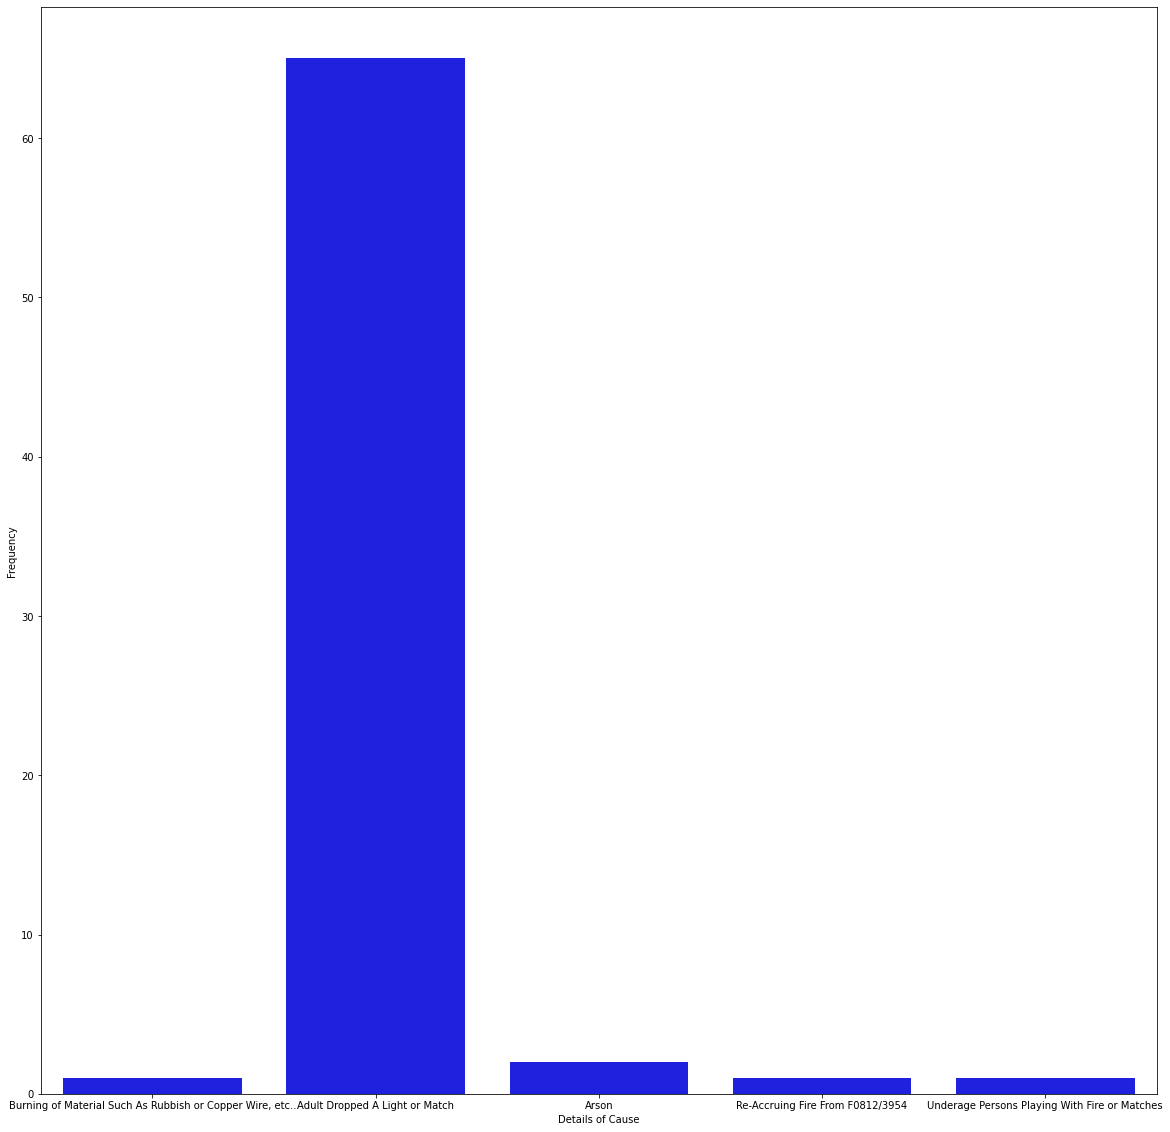

In [31]:
plt.figure(figsize=(20,20))
colors = ['red', 'blue', 'green', 'red', 'red', 'yellow', 'blue']
sns.countplot(wild_fire.iloc[:70]['Details_of_cause'], color="blue")
plt.ylabel("Frequency")
plt.xlabel("Details of Cause")

Text(0.5, 0, 'Details of Cause')

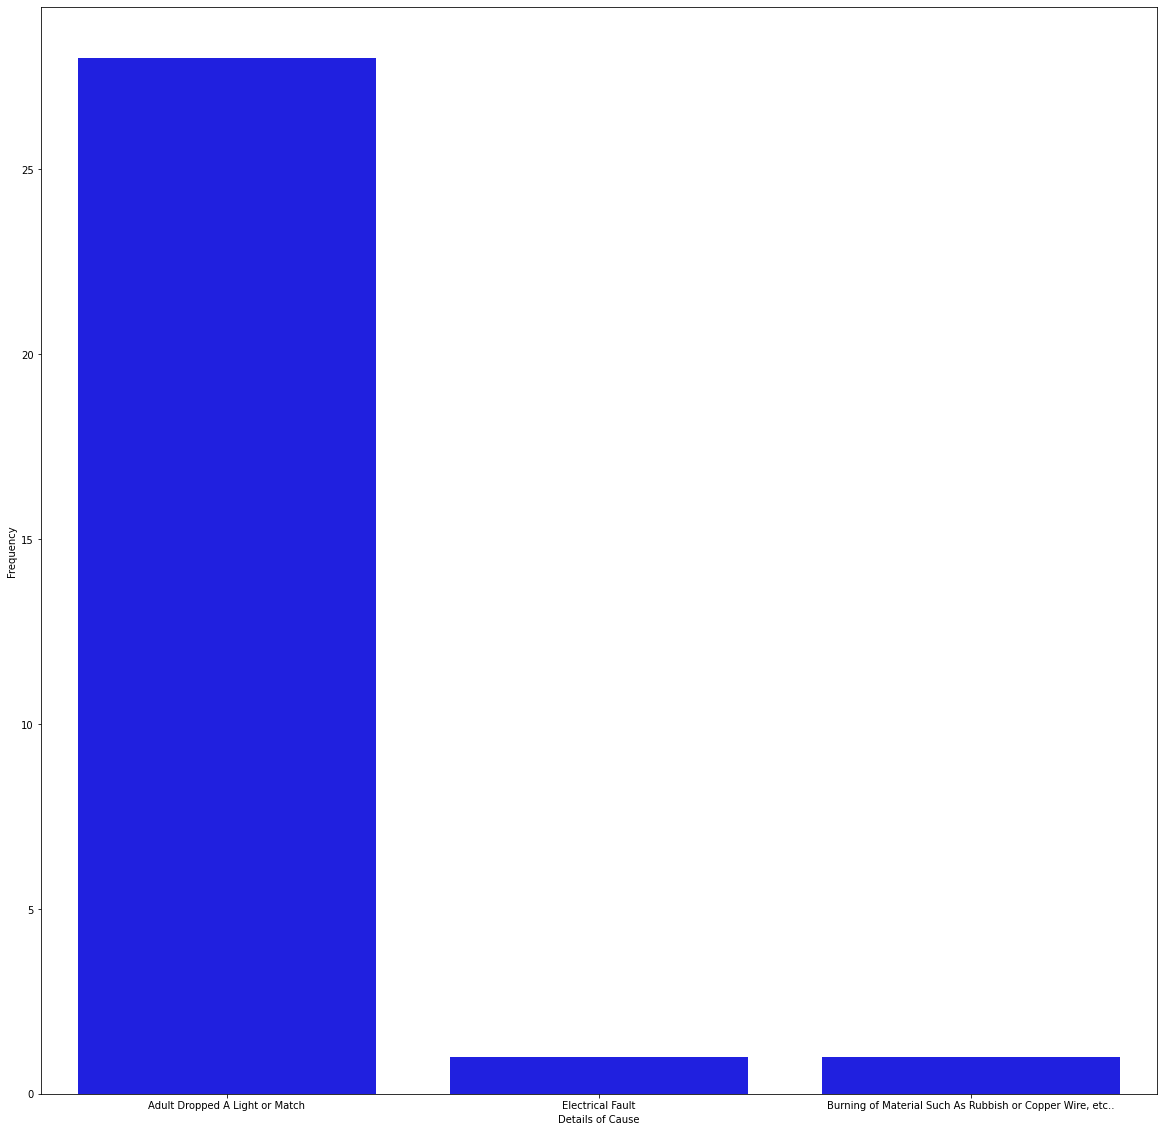

In [32]:
plt.figure(figsize=(20,20))
sns.countplot(wild_fire.iloc[70:100]['Details_of_cause'], color="blue")
plt.ylabel("Frequency")
plt.xlabel("Details of Cause")

Text(0.5, 0, 'Details of Cause')

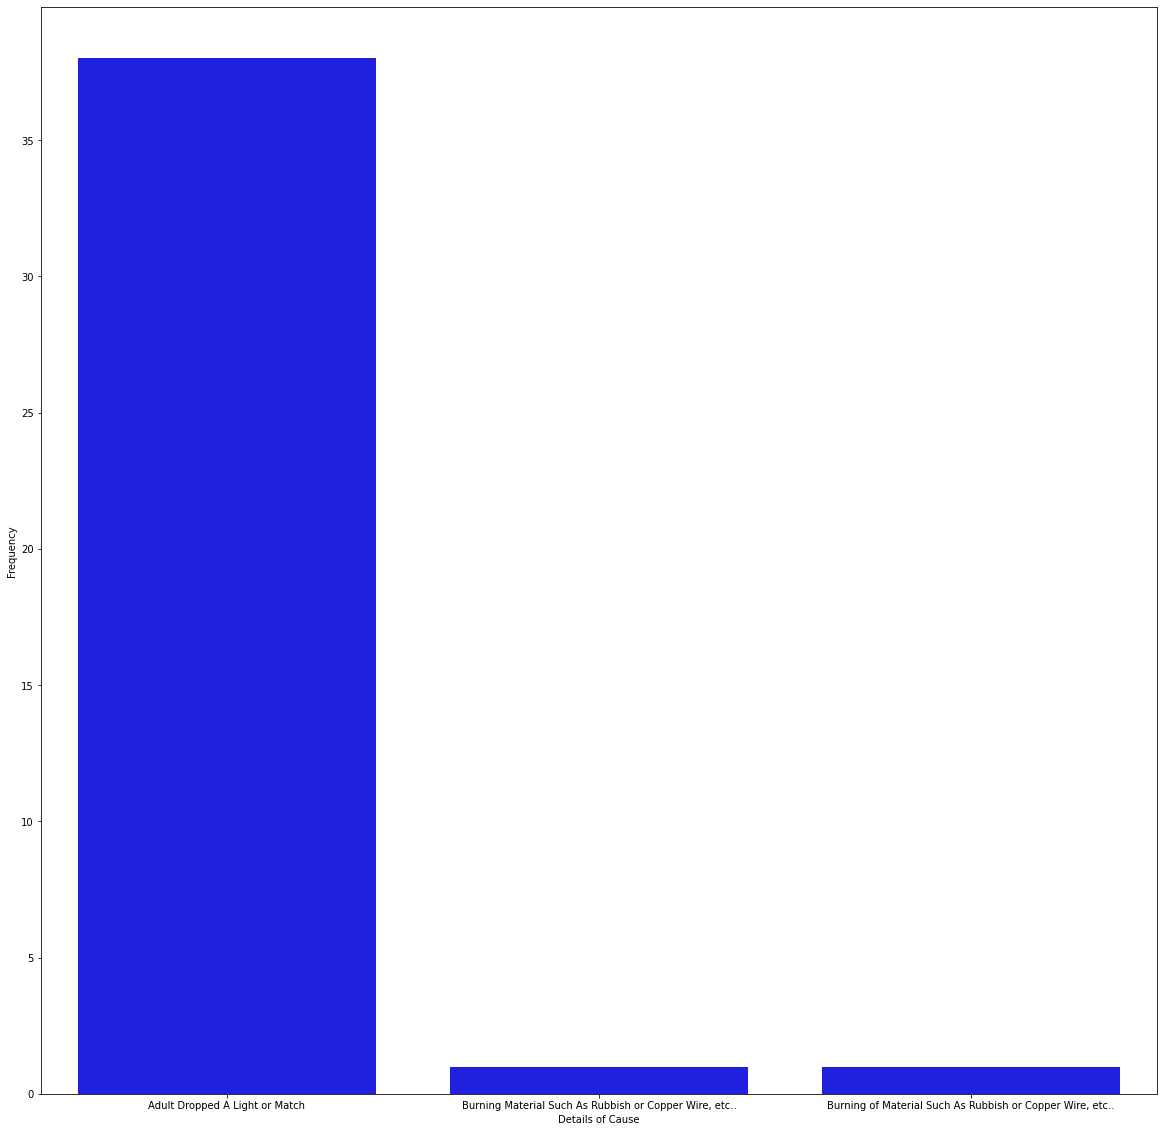

In [33]:
plt.figure(figsize=(20,20))
sns.countplot(wild_fire.iloc[200:240]['Details_of_cause'], color="blue")
# wild_fire.iloc[200:240]['Details_of_cause'].plot(wild_fire.iloc[200:240]['Details_of_cause'], color="red")
plt.ylabel("Frequency")
plt.xlabel("Details of Cause")

Text(0.5, 0, 'Details of Cause')

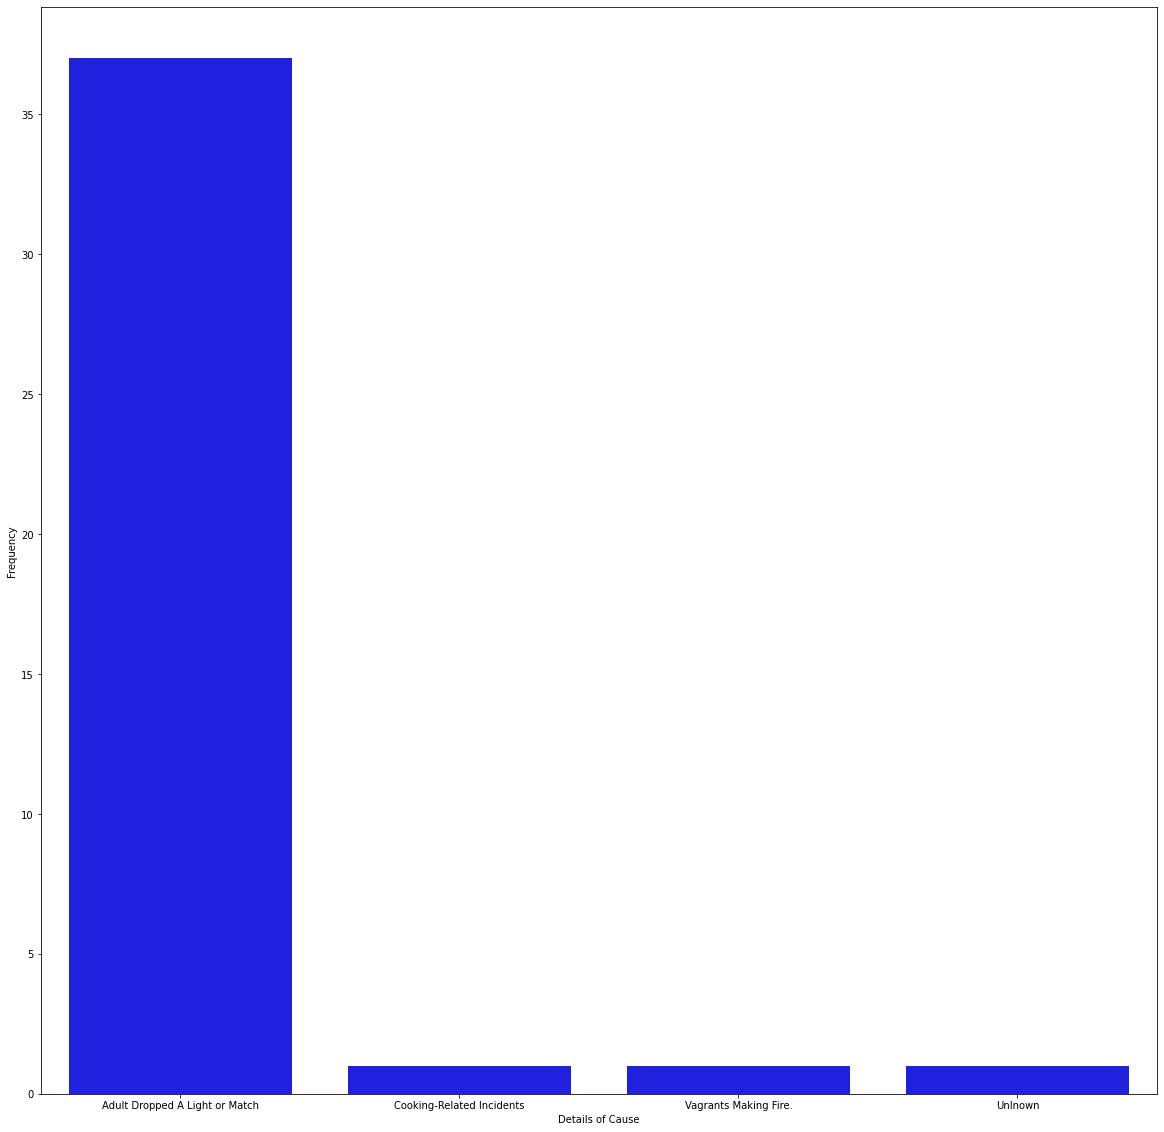

In [34]:
plt.figure(figsize=(20,20))
sns.countplot(wild_fire.iloc[240:280]['Details_of_cause'], color="blue")
plt.ylabel("Frequency")
plt.xlabel("Details of Cause")

Text(0.5, 0, 'Details of Cause')

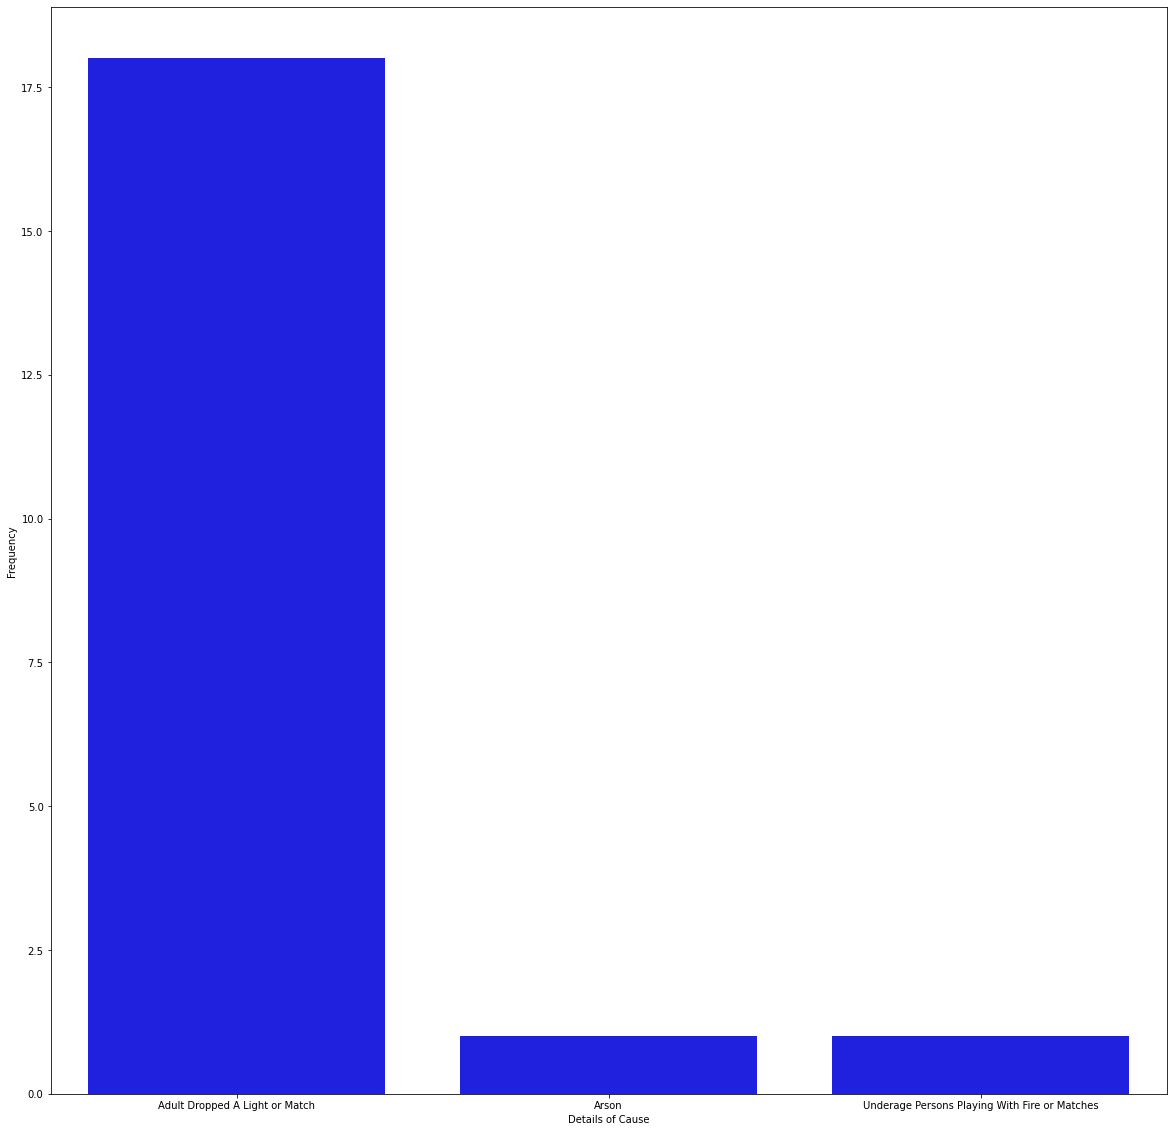

In [35]:
plt.figure(figsize=(20,20))
sns.countplot(wild_fire.iloc[280:300]['Details_of_cause'], color="blue")
plt.ylabel("Frequency")
plt.xlabel("Details of Cause")